# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 데이터 나누기

In [4]:
# 데이터타입 확인

data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
# 데이터타입 변경

data['datetime'] = data['datetime'].astype('datetime64')

In [6]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [8]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

In [9]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

가설) 
1. 년도, 월. 날, 시간- 어느 때 사용량이 많을까?
   겨울보다 봄, 여름, 가을에 사용량이 많을 것이다. 년-월 일치 할 것 (계절)
   하루 중 출퇴근 시간에 사용량이 많을 것이다.
   밤보다 낮시간에 사용량이 많을 것이다. 
   버스나 지하철이 끊기는 시간에 사용량이 있을 것이다. 
 
   
2. 출근 시간에 사용량이 많을 것이다. 
3. 퇴근 시간에 사용량이 많을 것이다.
4. 날씨(1,2)가 좋을 때 사용량이 많을 것이다. 
5. 휴일에는 출퇴근 시간이 아닐 때에도 이용량이 많을 것이다. 
6. 기온이 낮고, 체감온도가 낮으면 이용량이 없을 것이다. 
7. 풍속, 습도
8. 출퇴근 시간에는 등록된 회원의 이용 수가 많을 것이다. 
9. 휴일에는 임시회원의 수가 많을 것이다. 
   

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'hour_count')]

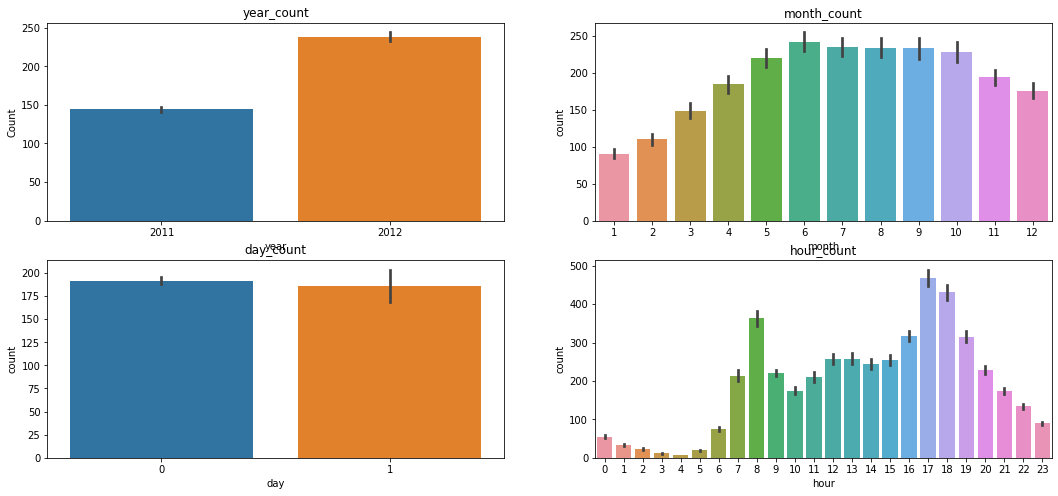

In [19]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악


figure, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

#년도와 count
sns.barplot(data=data, x="year", y="count", ax=ax1)

#month와 count
sns.barplot(data=data, x="month", y="count", ax=ax2)

#day와 count
sns.barplot(data=data, x="holiday", y="count", ax=ax3)

#hour와 count
sns.barplot(data=data, x="hour", y="count", ax=ax4)

ax1.set(ylabel='Count',title="year_count")
ax2.set(xlabel='month',title="month_count")
ax3.set(xlabel='day', title="day_count")
ax4.set(xlabel='hour', title="hour_count")


# #년도와 count
# sns.barplot(x='season', y='count', data=data)

# fig = plt.figure(figsize=[12,10])
# ax1 = fig.add_subplot(2,2,1)
# ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())

# #month와 count
# ax2 = fig.add_subplot(2,2,2)
# ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

# #day와 count
# ax3 = fig.add_subplot(2,2,3)
# ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

# #hour와 count
# ax4 = fig.add_subplot(2,2,4)
# ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

NameError: name 'train' is not defined

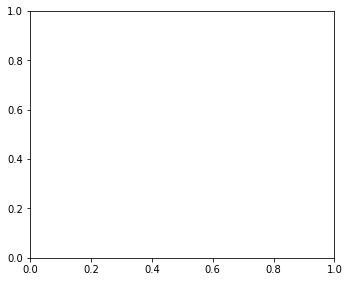

In [20]:
#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())